In [10]:
from imagegrains import data_loader, grainsizing, plotting, gsd_uncertainty
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

## Load the scaled results

In [11]:
data_path = Path('F:/demo/debug')
#find results in folder for 'fh_pred'
fh_pred_gsds = data_loader.load_grain_set(data_path,gsd_str='full_set_1_pred_grains_re_scaled')
#find results in folder for label masks
gt_mask_gsds = data_loader.load_grain_set(data_path,gsd_str='mask_grains_re_scaled')

## Calculate the grain size disdtributions (GSD)

In [12]:
#specify column name for axis
column_name='ell: b-axis (mm)'
#load results and get gsd for each image for a specific axis column
fh_gsd_l,fh_id_l = grainsizing.gsd_for_set(fh_pred_gsds,column=column_name)
#do the same for label masks
gt_gsd_l,gt_id_l = grainsizing.gsd_for_set(gt_mask_gsds,column=column_name)

### Plot the GSDs

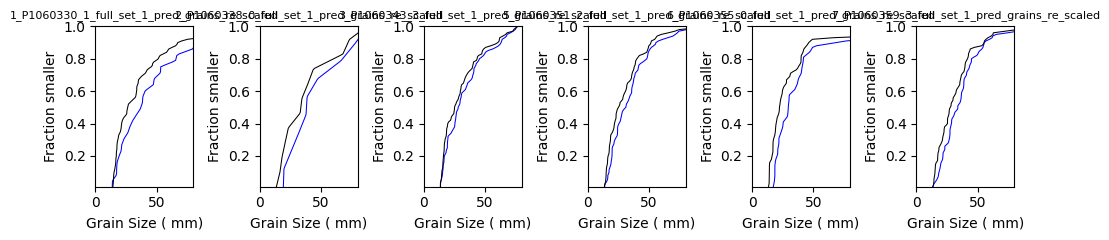

In [13]:
plt.figure(figsize=(10,2.5))
for i in range(len(fh_gsd_l)):
    plt.subplot(1,len(fh_gsd_l),i+1)
    plotting.plot_gsd(fh_gsd_l[i],color='b',length_max=80,orientation='vertical',label_axes=True,units= 'mm')
    plotting.plot_gsd(gt_gsd_l[i],color='k',length_max=80,orientation='vertical',label_axes=True,units= 'mm',title=fh_id_l[i].split('_fh_pred')[0])

## Calculate percentile uncertainties

In [14]:
#number of iterations for randomization
num_it  = 1000

In [15]:
# Percentile uncertainty with bootstrapping (counting statistics only)
res_dict_bs = gsd_uncertainty.dataset_uncertainty(gsds=fh_pred_gsds,num_it=num_it,mute=True,column_name=column_name,return_results=True,sep=',',gsd_id = fh_id_l)
# Percentile uncertainty with Monte Carlo (counting statistics & scale, length uncertainty)
res_dict_MC = gsd_uncertainty.dataset_uncertainty(fh_pred_gsds,num_it=num_it,mute=True,column_name=column_name,method='MC',return_results=True,sep=',',gsd_id = fh_id_l)

MC: 100%|██████████| 6/6 [02:28<00:00, 24.73s/gsd]


In [16]:
# Estimate uncertainty for ground truth 
res_dict_gt_bs = gsd_uncertainty.dataset_uncertainty(gsds=gt_mask_gsds,num_it=num_it,mute=True,column_name=column_name,return_results=True,sep=',',gsd_id = gt_id_l)
res_dict_gt_MC = gsd_uncertainty.dataset_uncertainty(gsds=gt_mask_gsds,num_it=num_it,mute=True,column_name=column_name,method='MC',return_results=True,sep=',',gsd_id = gt_id_l)

MC: 100%|██████████| 6/6 [02:03<00:00, 20.54s/gsd]


### Compare uncertainty methods

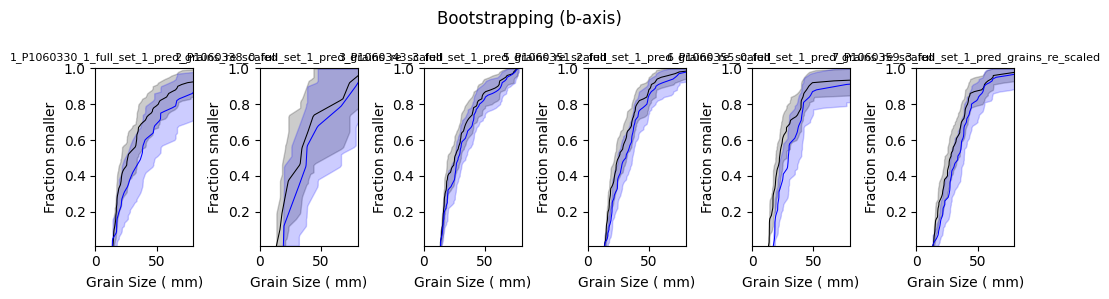

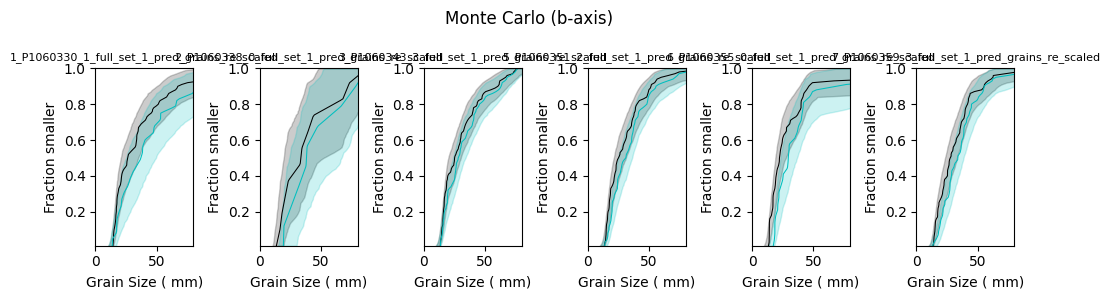

In [17]:
plt.figure(figsize=(10,3))
for i in range(len(fh_gsd_l)):
    plt.subplot(1,len(fh_gsd_l),i+1)
    #plot gt gsd for reference
    plotting.plot_gsd(gt_gsd_l[i],color='k',length_max=80,orientation='vertical',label_axes=True,units= 'mm',title=fh_id_l[i].split('_fh_pred')[0])
    #plot gt uncertainty for reference
    plotting.plot_gsd_uncert(res_dict_gt_bs[gt_id_l[i]],color='k')
    #plot gsd
    plotting.plot_gsd(fh_gsd_l[i],color='b',length_max=80,orientation='vertical',label_axes=True,units= 'mm')
    #plot uncertainty
    plotting.plot_gsd_uncert(res_dict_bs[fh_id_l[i]],color='b')
    plt.suptitle('Bootstrapping (b-axis)')

plt.figure(figsize=(10,3))
for i in range(len(fh_gsd_l)):
    plt.subplot(1,len(fh_gsd_l),i+1)
    #plot gt gsd for reference
    plotting.plot_gsd(gt_gsd_l[i],color='k',length_max=80,orientation='vertical',label_axes=True,units= 'mm',title=fh_id_l[i].split('_fh_pred')[0])
    #plot gt uncertainty for reference
    plotting.plot_gsd_uncert(res_dict_gt_MC[gt_id_l[i]],color='k')
    #plot gsd
    plotting.plot_gsd(fh_gsd_l[i],color='c',length_max=80,orientation='vertical',label_axes=True,units= 'mm')
    #plot uncertainty
    plotting.plot_gsd_uncert(res_dict_MC[fh_id_l[i]],color='c')
    plt.suptitle('Monte Carlo (b-axis)')

## Calculate grain size statistics for each image

In [18]:
summary_df = grainsizing.summary_statistics(fh_pred_gsds,fh_id_l,res_dict=res_dict_bs,data_id='fh_demo')
summary_df.head()

,Image/Masks,number of grains,D16,CI D16 (95%),D50,CI D50 (95%),D84,CI D84 (95%),D96,CI D96 (95%),unit,axis,method,grain approximation
0,1_P1060330_1_full_set_1_pred_grains_re_scaled,28,15.9,[14. 26.5],33.8,[24.9 50.6],68.1,[ 48. 132.6],126.2,[ 66.6 174. ],mm,b-axis,bootstrapping,ellipse
1,2_P1060338_0_full_set_1_pred_grains_re_scaled,10,19.8,[19.4 37.9],34.5,[25.9 66.5],65.9,[38.8 89. ],76.8,[47.4 89. ],mm,b-axis,bootstrapping,ellipse
2,3_P1060343_3_full_set_1_pred_grains_re_scaled,68,14.8,[15.2 19.2],25.9,[25.3 34.6],47.2,[41.4 65. ],65.8,[62.8 76.6],mm,b-axis,bootstrapping,ellipse
3,5_P1060351_2_full_set_1_pred_grains_re_scaled,58,17.0,[16.2 20.6],28.1,[24.2 36.3],44.9,[41.1 67.8],66.9,[ 55.5 136.9],mm,b-axis,bootstrapping,ellipse
4,6_P1060355_0_full_set_1_pred_grains_re_scaled,31,17.0,[18.3 22.6],26.7,[23.5 40.1],43.1,[ 38.3 132.2],120.6,[ 47.3 152. ],mm,b-axis,bootstrapping,ellipse
